In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf

In [2]:
# Download stock data
ticker = "AAPL"
data = yf.download(ticker, period="5y", interval="1d")
prices = data['Close'].values.reshape(-1,1)

C:\Users\samik\AppData\Local\Temp\ipykernel_7792\996047693.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period="5y", interval="1d")
[*********************100%***********************]  1 of 1 completed


In [3]:

# Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_prices = scaler.fit_transform(prices)

In [4]:
# Create time-series dataset
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_prices, time_step)

In [5]:
# Reshape input for RNN
X = X.reshape((X.shape[0], X.shape[1], 1))

In [6]:
# Split into training and testing
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [7]:
# Build RNN model
model = Sequential([
    SimpleRNN(50, return_sequences=True, input_shape=(time_step, 1)),
    SimpleRNN(50, return_sequences=False),
    Dense(25, activation='relu'),
    Dense(1)
])


model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\samik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0559 - val_loss: 0.0037
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0016 - val_loss: 0.0026
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0010 - val_loss: 0.0024
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 9.5386e-04 - val_loss: 0.0030
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 8.0459e-04 - val_loss: 0.0021
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 7.5784e-04 - val_loss: 0.0027
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 6.7910e-04 - val_loss: 0.0028
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 8.9676e-04 - val_loss: 0.0019
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 7.1316e-04 - val_loss: 0.0019
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 5.8522e-04 - val_loss: 0.0018
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 6.3807e-04 - val_loss: 0.0023
Epoch 12/20
30/30 ━━━━━━━━━━━━━

In [9]:

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1,1))

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


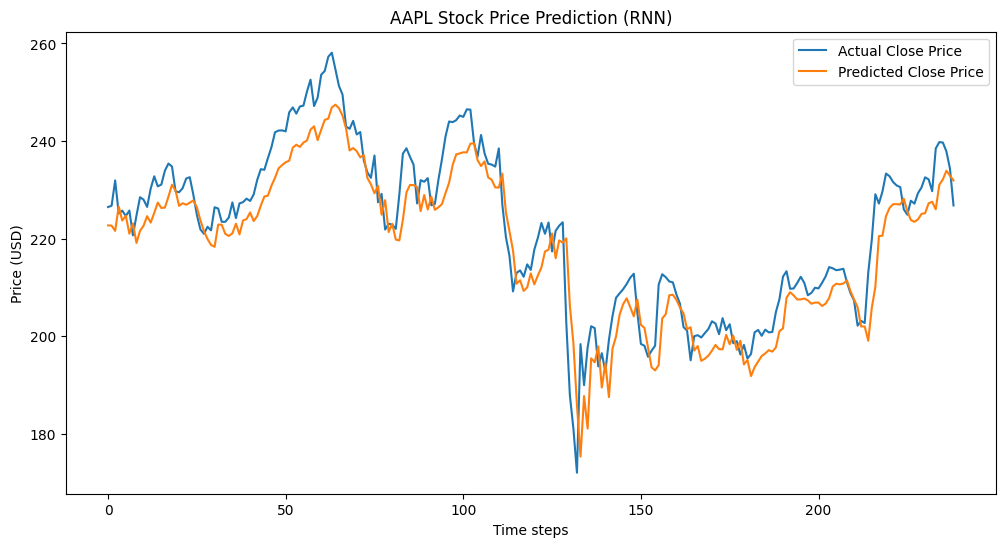

In [10]:
# Plot actual vs predicted prices
plt.figure(figsize=(12,6))
plt.plot(y_test_rescaled, label='Actual Close Price')
plt.plot(predictions, label='Predicted Close Price')
plt.title('AAPL Stock Price Prediction (RNN)')
plt.xlabel('Time steps')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler

In [12]:
# Load daily minimum temperatures dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
data = pd.read_csv(url)
temps = data['Temp'].values.reshape(-1,1)

In [13]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_temps = scaler.fit_transform(temps)

In [14]:
# Create time-series dataset
def create_dataset(dataset, time_step=30):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 30
X, y = create_dataset(scaled_temps, time_step)

In [15]:
# Reshape input for RNN
X = X.reshape((X.shape[0], X.shape[1], 1))

In [16]:
# Split into training and testing
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [17]:
# Build RNN model
model = Sequential([
    SimpleRNN(50, return_sequences=True, input_shape=(time_step, 1)),
    SimpleRNN(50, return_sequences=False),
    Dense(25, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\samik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0296 - val_loss: 0.0083
Epoch 2/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0100 - val_loss: 0.0094
Epoch 3/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0101 - val_loss: 0.0089
Epoch 4/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0110 - val_loss: 0.0072
Epoch 5/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0102 - val_loss: 0.0071
Epoch 6/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0101 - val_loss: 0.0075
Epoch 7/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0091 - val_loss: 0.0075
Epoch 8/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0093 - val_loss: 0.0078
Epoch 9/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0091 - val_loss: 0.0073
Epoch 10/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0094 - val_loss: 0.0106
Epoch 11/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0099 - val_loss: 0.0086
Epoch 12/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0

In [19]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1,1))

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


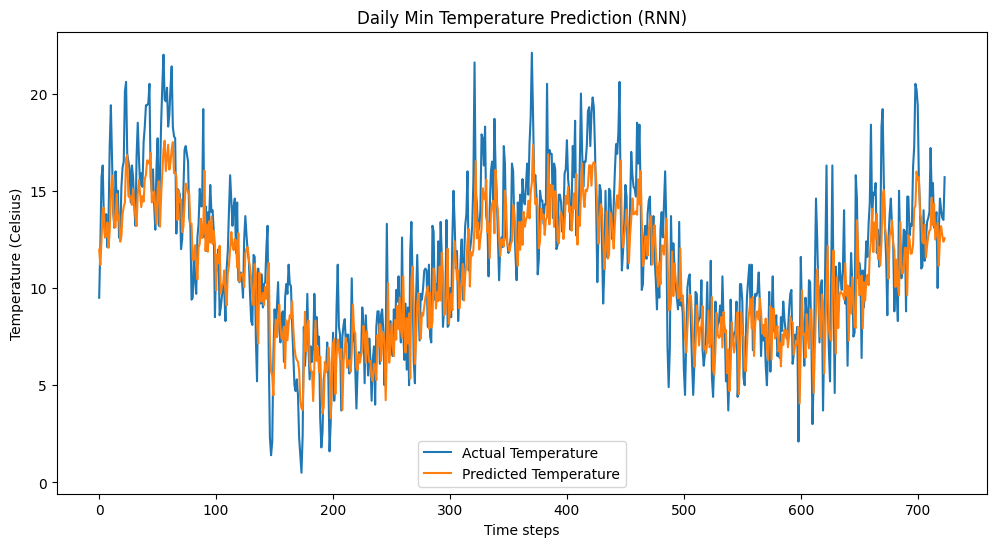

In [20]:

# Plot actual vs predicted temperatures
plt.figure(figsize=(12,6))
plt.plot(y_test_rescaled, label='Actual Temperature')
plt.plot(predictions, label='Predicted Temperature')
plt.title('Daily Min Temperature Prediction (RNN)')
plt.xlabel('Time steps')
plt.ylabel('Temperature (Celsius)')
plt.legend()
plt.show()